In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_to_csv = '/content/gdrive/My Drive/diabetes.csv'

In [3]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv(path_to_csv, header=None).values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:, 0:8], dataset[:, 8], test_size=0.25, random_state=87)

# Set random seed for reproducibility
np.random.seed(155)

# Create a Sequential model
model = Sequential()

# Add Dense layers with 'relu' activation for hidden layers
model.add(Dense(20, input_dim=8, activation='relu'))  # First hidden layer
model.add(Dense(15, activation='relu'))  # Second hidden layer
model.add(Dense(10, activation='relu'))  # Third hidden layer

# Add output layer with 'sigmoid' activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model using binary crossentropy and adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Train the model
model_fitted = model.fit(X_train, Y_train, epochs=100, initial_epoch=0)

# Print model summary and evaluate accuracy on the test set
print(model.summary())
print(model.evaluate(X_test,Y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.6717 - loss: 16.6263
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6634 - loss: 9.1129 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6590 - loss: 3.1371  
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5398 - loss: 1.0570
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6040 - loss: 0.7778
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6704 - loss: 0.7215 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6636 - loss: 0.7162 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6992 - loss: 0.6855
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.6777 - loss: 0.6951 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6441 - loss: 0.6967 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6803 - loss: 0.6494 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6855 - loss: 0.6332 
Epoch 13/100
18/18 ━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 20)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,000 (7.82 KB)

 Trainable params: 666 (2.60 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,334 (5.21 KB)

None
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.6705 - loss: 0.6099  
[0.6247989535331726, 0.6666666865348816]


In [4]:
path_to_csv1 = '/content/gdrive/My Drive/breastcancer.csv'

In [5]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv1, header=None).values

X = dataset[1:, 2:-1]  # Features
Y = dataset[1:, -1]   # Labels (M or B)

# Convert labels to binary format
Y = np.where(Y == 'M', 1, 0)  # M -> 1, B -> 0

#Convert to numeric
X = X.astype(np.float64) # Convert X to numeric

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25, random_state=87)


np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer
my_first_nn.add(Dense(30, activation='relu')) # hidden layer
my_first_nn.add(Dense(40, activation='relu')) # hidden layer
my_first_nn.add(Dense(50, activation='relu')) # hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test,Y_test))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.1753 - loss: 44.9433    
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 9.3662e-11 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 4.7119e-13  
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 1.8413e-14 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 8.2208e-14 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 2.5290e-14 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 5.6485e-14  
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 5.6193e-14  
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 3.7084e-14 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 6.8442e-14 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 1.4374e-13 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,775 (53.81 KB)

 Trainable params: 4,591 (17.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,184 (35.88 KB)

None
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 1.0000 - loss: 1.2830e-12  
[2.4695894201148816e-12, 1.0]


In [7]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Load dataset
dataset = pd.read_csv(path_to_csv1, header=None).values

X = dataset[1:, 2:-1]  # Features
Y = dataset[1:, -1]   # Labels (M or B)

# Convert labels to binary format
Y = np.where(Y == 'M', 1, 0)  # M -> 1, B -> 0

# Convert to numeric
X = X.astype(np.float64)  # Convert X to numeric

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.25, random_state=87)

# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

np.random.seed(155)
my_first_nn = Sequential()  # Create model
my_first_nn.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))  # Hidden layer
my_first_nn.add(Dense(30, activation='relu'))  # Hidden layer
my_first_nn.add(Dense(40, activation='relu'))  # Hidden layer
my_first_nn.add(Dense(50, activation='relu'))  # Hidden layer

my_first_nn.add(Dense(1, activation='sigmoid'))  # Output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.7512 - loss: 0.6261
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.3047 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0880 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0185 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0060 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0030 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0018 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0015 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 0.0011     
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 8.0293e-04 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 5.6467e-04  
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 1.0000 - loss: 4.2385e-04 
Epoch 13/

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │             630 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 40)                  │           1,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 50)                  │           2,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,775 (53.81 KB)

 Trainable params: 4,591 (17.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,184 (35.88 KB)

None
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 1.0000 - loss: 2.6435e-06  
[2.8497036055341596e-06, 1.0]


In [8]:
path_to_csv1 = '/content/gdrive/My Drive/breastcancer.csv'

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


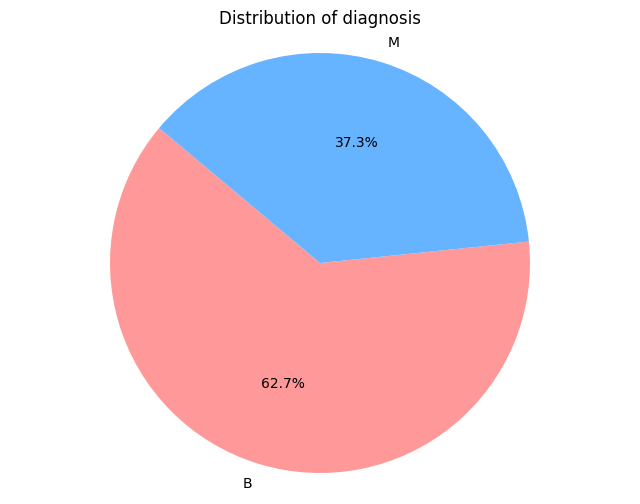

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/gdrive/My Drive/breastcancer.csv')

# Print the column names to help you choose the correct column
print(data.columns)

# Replace 'label_column' with the actual column name for labels
label_column = 'diagnosis'  # Example: 'diagnosis' for benign/malignant

# Count the occurrences of each class
label_counts = data[label_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title(f'Distribution of {label_column}')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()
